### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


#### (1) What is the independent variable? What is the dependent variable?

The independent variable is the congruent or incongruent condition. The dependent variable is the time to complete the test for each respective condition. 

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. What kind of statistical test do you expect to perform? Justify your choices.

Null hypothesis (H0): There is no significant difference in the mean completion times between the congruent and incongruent tests.

Alternative hypthothesis (H1): There is a significant difference in the mean completion times between the congruent and incongruent tests. 

While I have done the tests and took longer to complete the incongruent set of words, I don't want to make assumptions yet about the incongruent test. Therefore I have just said the completion time will just be different (could be greater or less than the congruent test). Therefore I am stating my null and alternative hypothesis as:

<br>
$$H_0: \mu_c = \mu_i$$

$$H_1: \mu_c \neq \mu_i$$

<br>


The statistical test i would expect to perform is a two-tail dependent sample (or paired sample) t-test. Firstly, we do not have any population parameters provided. Secondly, the same set of people in the sample are subjected to the two different test conditions - congruent and incogruent words.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math 
import seaborn as sns
from matplotlib import pyplot


# Enable visualisations within Jupyter notebook
% matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Observations - Descriptive Statistics
1. The sample size is 24 for both the congruent and incongruent test.
2. The mean time of the congruent test was about 14.051 whereas the incongruent test is higher with approximately 22.016. 
3. The median for the congruent test is around 14.357 and the incongruent test is roughly 21.018. 
4. Both the mean and median results indicate that the incongruent test took longer to complete than the congruent test (mean diff = 7.965 and median diff = 6.661).
5. The standard deviation for the time taken on the congruent test (3.559) is smaller than the incongruent test (4.797). This means the incongruent test results are more spread out from the mean than the congruent test.

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

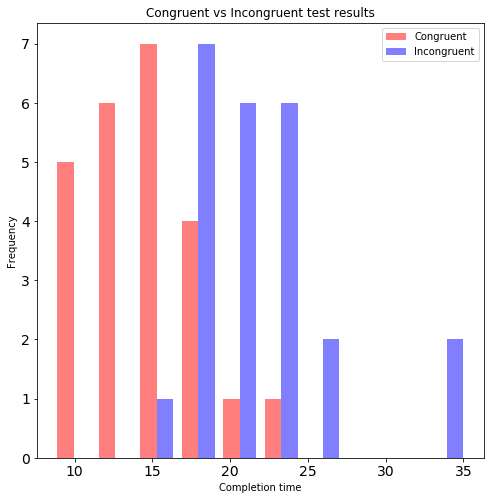

In [15]:
# Build the visualizations here
#df.hist(figsize = (10,6))
# Plot using Seaborn
dims = (8, 8)
pyplot.subplots(figsize=dims)
x = df['Congruent']
y = df['Incongruent']
ax=plt.hist([x, y], color=['r','b'], alpha=0.5)  #https://stackoverflow.com/questions/36362624/how-to-plot-multiple-histograms-on-same-plot-with-seaborn

# Set chart title and axis descriptions
plt.title('Congruent vs Incongruent test results')
plt.xlabel('Completion time')
plt.ylabel('Frequency')

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

labels= ["Congruent","Incongruent"]  #https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-legend
plt.legend(labels)


plt.show()

#### Observations

There is a slight overlap in completion times for both congruent and incongruent tests. However, the completion times for the incongruent list of words (purple bars) is generally longer than the congruent list of words (pink bars).

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [4]:
# Calculate mean differences
cong_mean = df['Congruent'].mean()
incong_mean = df['Incongruent'].mean()
mean_diff = cong_mean - incong_mean
print("Mean differences is: " + str(mean_diff))

# Calculate sample size (n)
n = df.shape[0]
print("Sample size: " + str(n))
print("Degrees of freedom: " + str(n - 1))

# Calculate the standard deviation of differences
df['Diff'] = df['Congruent'] - df['Incongruent']
std = df['Diff'].std(ddof=1)  #http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html
print("std of mean differences: " + str(std))

# Calculate the Standard Error Mean (SEM)
SEM = std/math.sqrt(n)  #https://stackoverflow.com/questions/9595135/how-do-i-calculate-square-root-in-python
print("SEM:  " + str(SEM))

# Calculate t-statistic
tstat = mean_diff / SEM
print("t-statistic is: " + str(tstat))

# Calculate t-critical
tcrit = stats.t.isf(0.025, n-1) #https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
print("t-critical value (two-tail 95%): +/-" + str(tcrit))

# p-value
pval = stats.t.sf(np.abs(tstat), n-1)*2 # two-sided pvalue
print(pval)

# Calculate p-value check
# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
stats.ttest_rel(df['Congruent'], df['Incongruent'])  #check: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html


Mean differences is: -7.964791666666665
Sample size: 24
Degrees of freedom: 23
std of mean differences: 4.864826910359056
SEM:  0.9930286347783406
t-statistic is: -8.020706944109955
t-critical value (two-tail 95%): +/-2.068657610419041
4.103000585711186e-08


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [5]:
# Perform the statistical test here



#https://github.com/abodacs/Test-a-Perceptual-Phenomenon/blob/master/Test%20a%20Perceptual%20Phenomenon.ipynb
#    https://github.com/j450h1/P1-Test-a-Perceptual-Phenomenon/blob/master/Project%20Questions.ipynb
#        https://github.com/BullyBear/Testing-A-Perceptual-Phenomenon/blob/master/Testing%20A%20Perceptual%20Phenomenon.pdf
#            https://github.com/eminnett/da-nanodegree-test-a-perceptual-phenomenon/blob/master/test_a_perceptual_phenomenon.ipynb
#                https://github.com/gdtm86/testing-perceptual-phenomenon/blob/master/P1-Statistics-Stroop-Effect-Results-v3.pdf
                   


--write answer here--

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--